### **Exploratory Data Analysis (EDA)**

In this section, we perform **Exploratory Data Analysis (EDA)** to gain a deeper understanding of the dataset.  
EDA helps us uncover important insights such as data distribution, missing values, correlations, and potential anomalies.  
These findings are crucial in shaping the preprocessing steps and guiding the design of the anomaly detection pipeline.


In [6]:
 # Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # Loading the data 
DATA = pd.read_csv('creditcard.csv')

In [3]:
display( DATA.head(5) )
display( DATA.tail(5))

 # Printing shape
print( 'Total Rows : ', DATA.shape[0], '  ,Total Columns : ', DATA.shape[1] )
display( DATA.columns.to_frame())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Total Rows :  284807   ,Total Columns :  31


,0
Time,Time
V1,V1
V2,V2
V3,V3
V4,V4
V5,V5
V6,V6
V7,V7
V8,V8
V9,V9


### **Dataset Overview**

The dataset consists of **284,807 rows and 31 columns**.  
- The columns include **Time**, **Amount**, **V1–V28**, and **Class**.  
- **V1–V28** are principal components generated using **PCA** (due to confidentiality, the original features are not provided).  
- **Time** represents the elapsed seconds between each transaction and the first transaction.  
- **Amount** indicates the monetary value of the transaction.  
- **Class** is the target variable, where:  
  - **1** → Fraudulent transaction  
  - **0** → Non-fraudulent transaction

In [4]:
 # getting statistical description
display( DATA.describe() )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **Descriptive Statistics**

From the descriptive statistics, we observe the following:  
- The **mean transaction time** is approximately **47,488 seconds**.  
- The **mean transaction amount** is **88.93**.  
- The **maximum transaction amount** is **25,691.16**, while the **minimum is 0.0**.  
- The **maximum class value is 1**, which indicates the presence of fraudulent transactions.  
  - This also suggests a potential **class imbalance**, which requires further analysis.


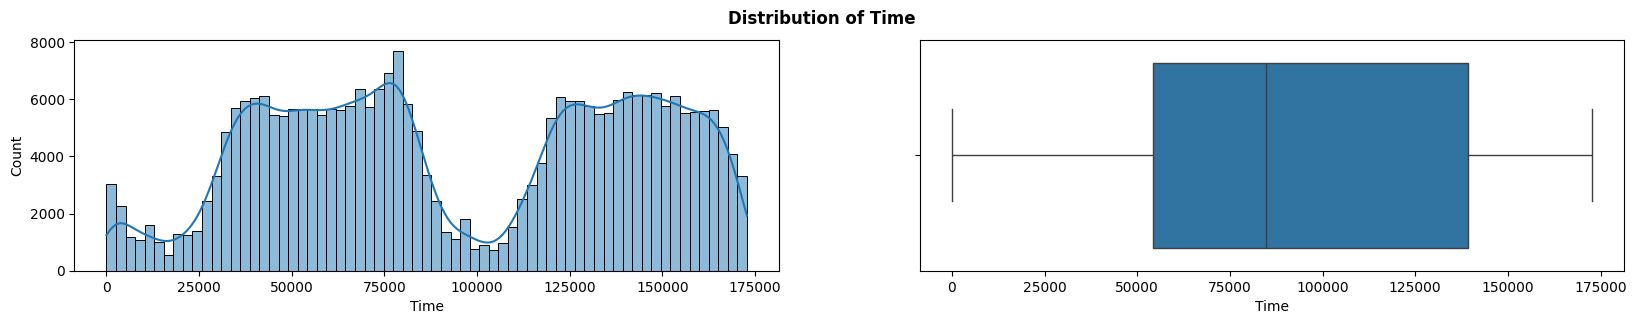

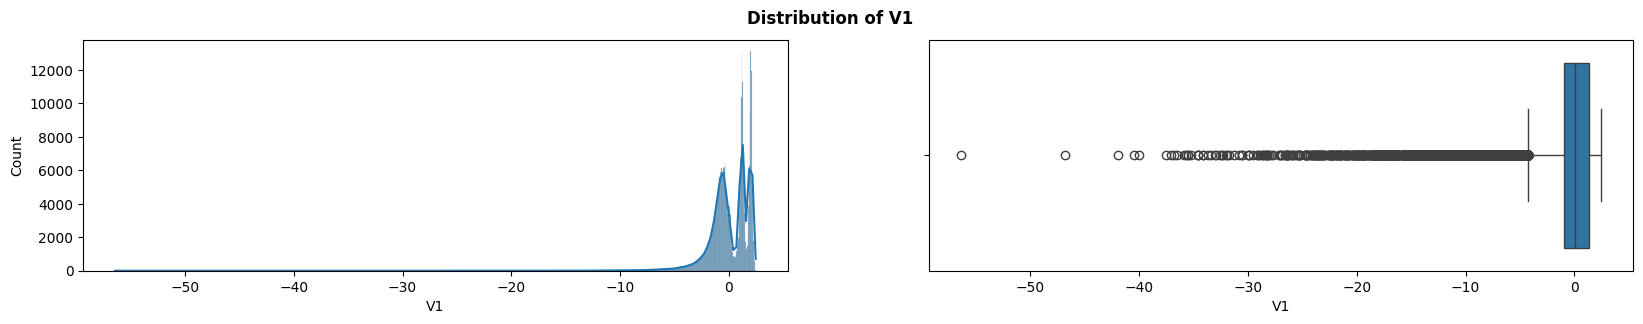

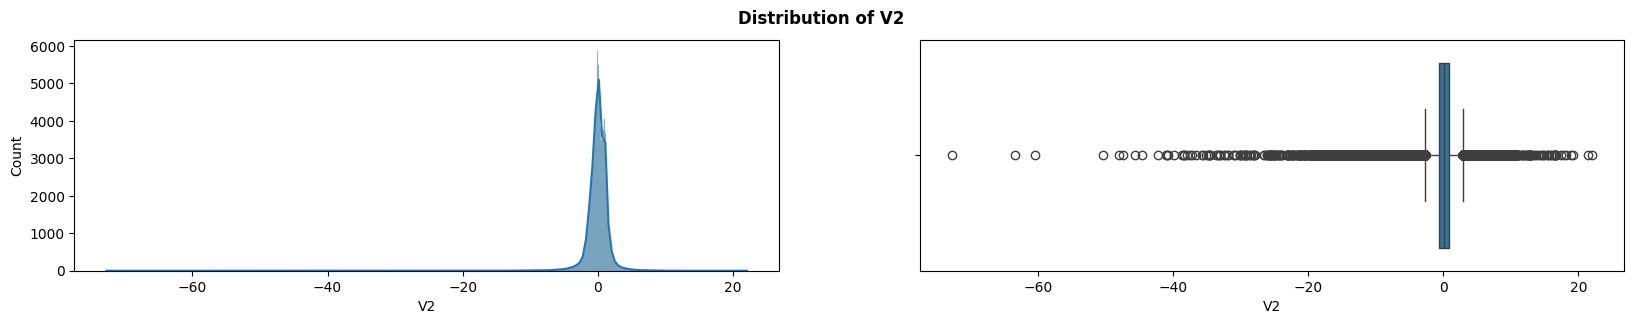

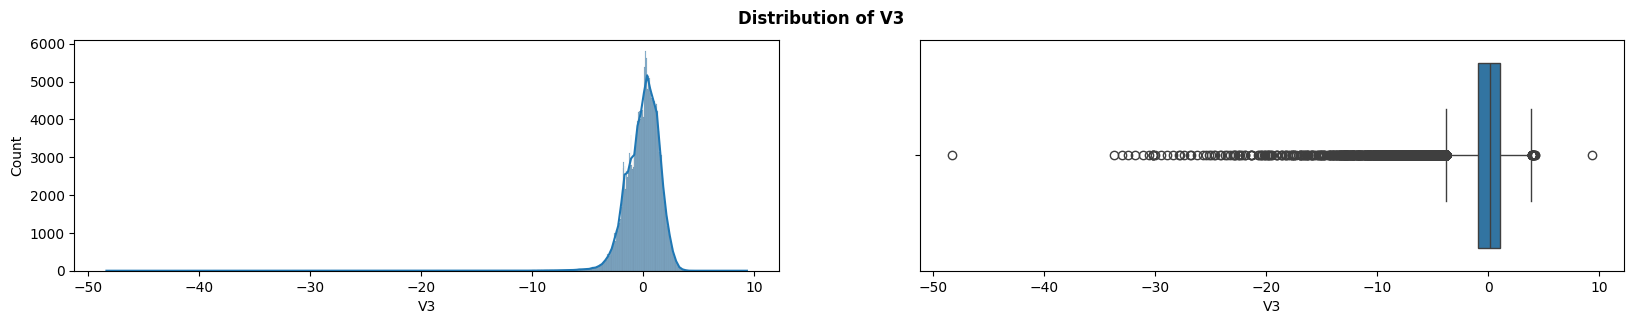

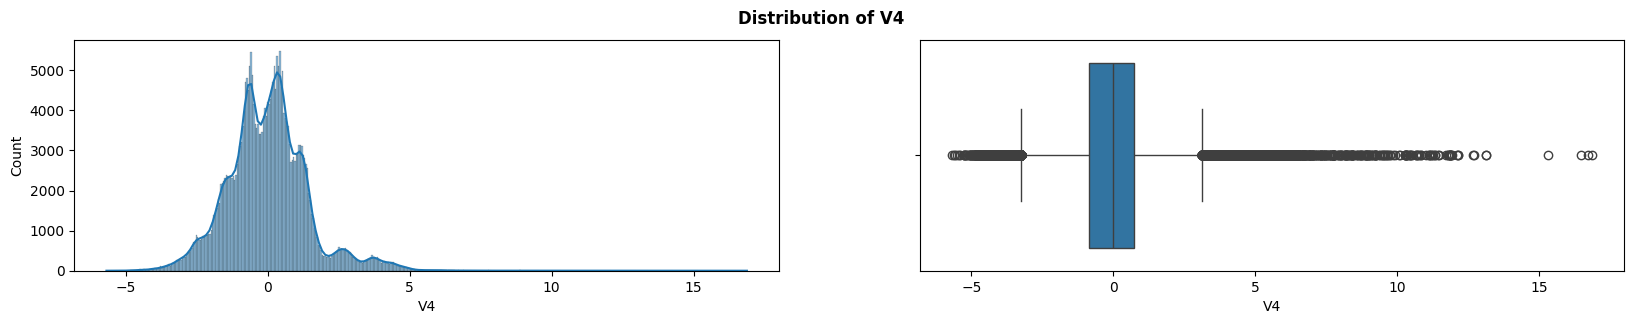

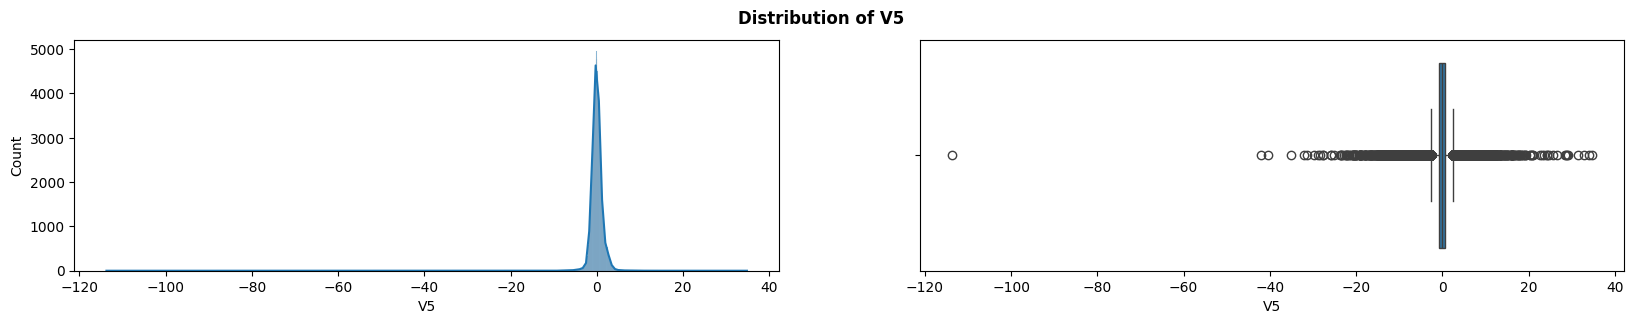

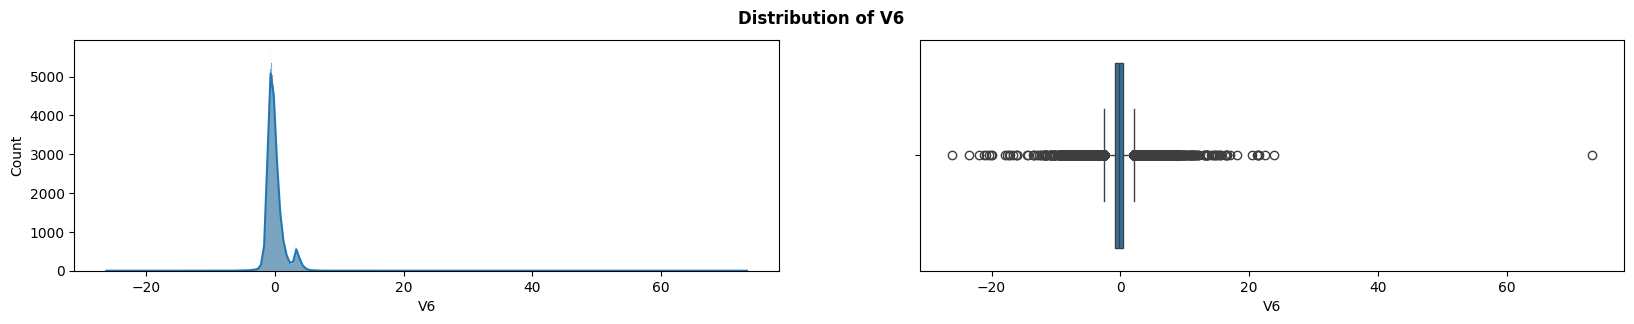

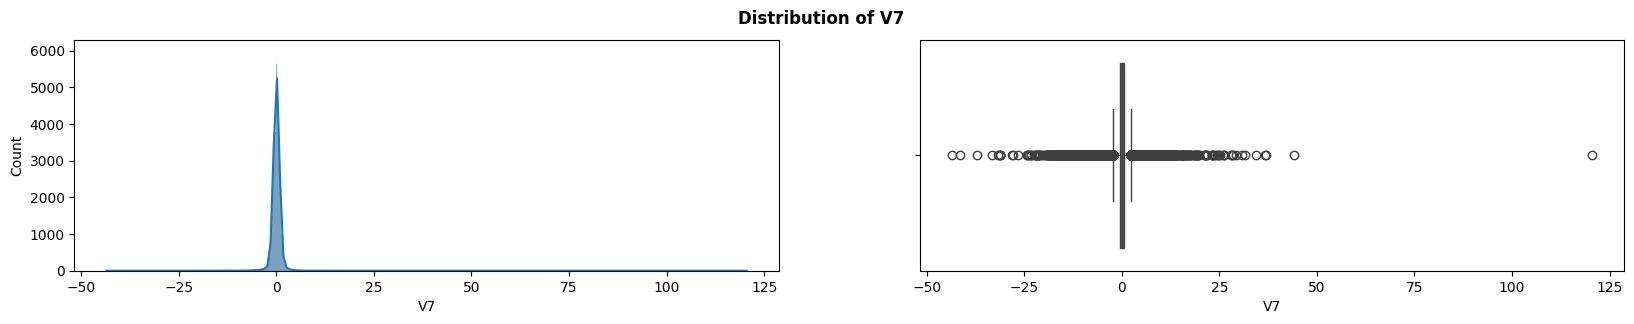

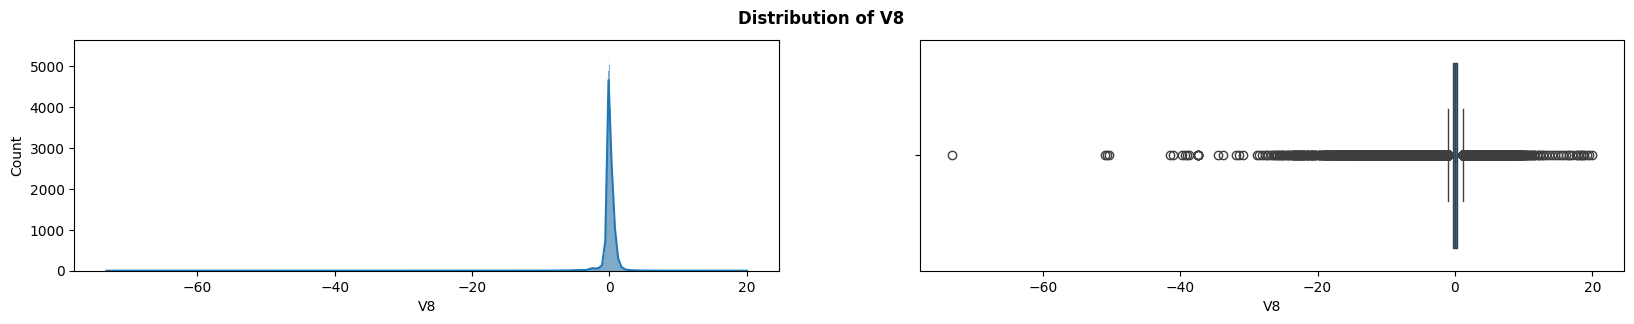

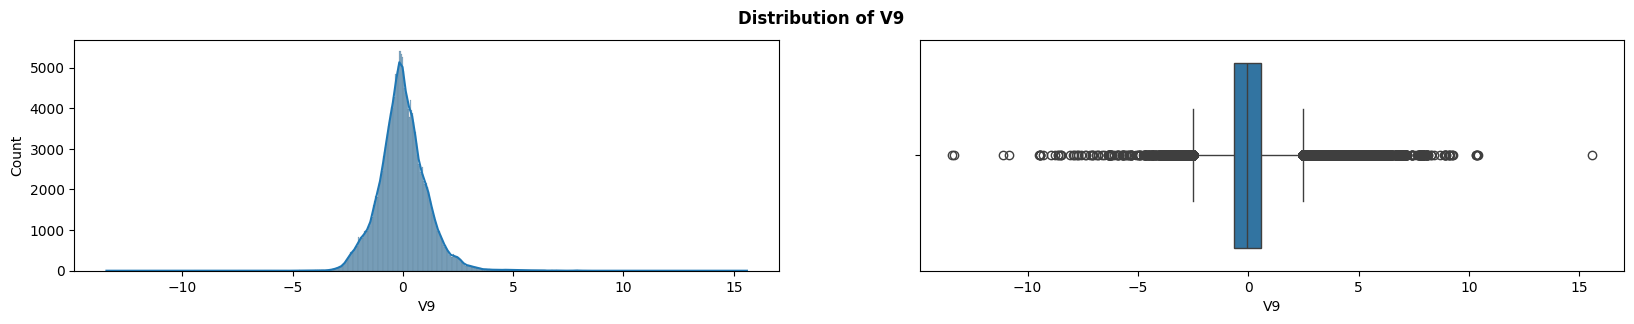

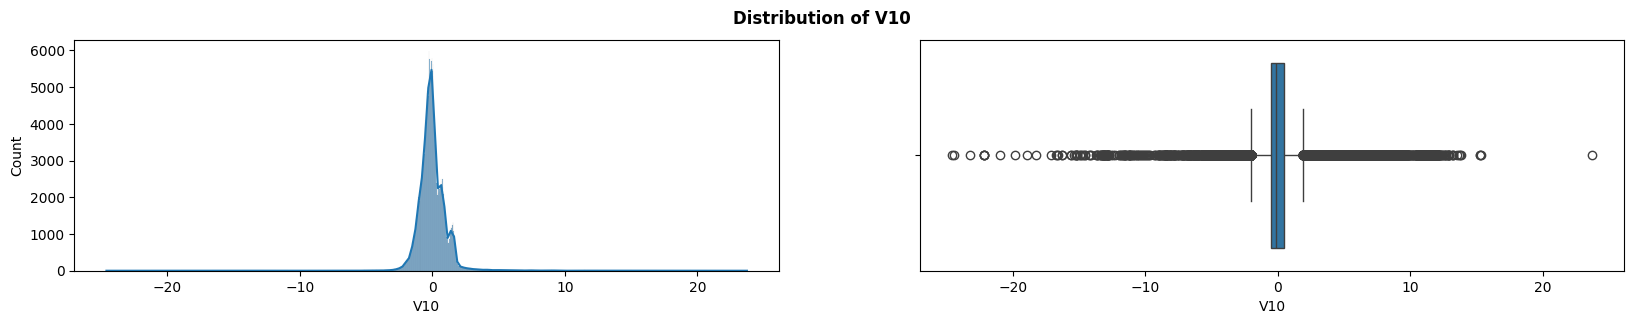

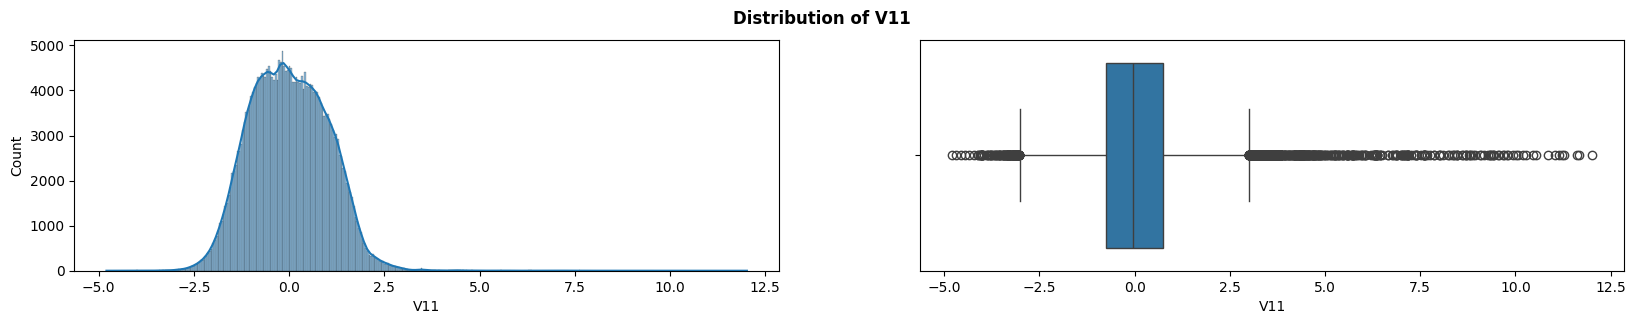

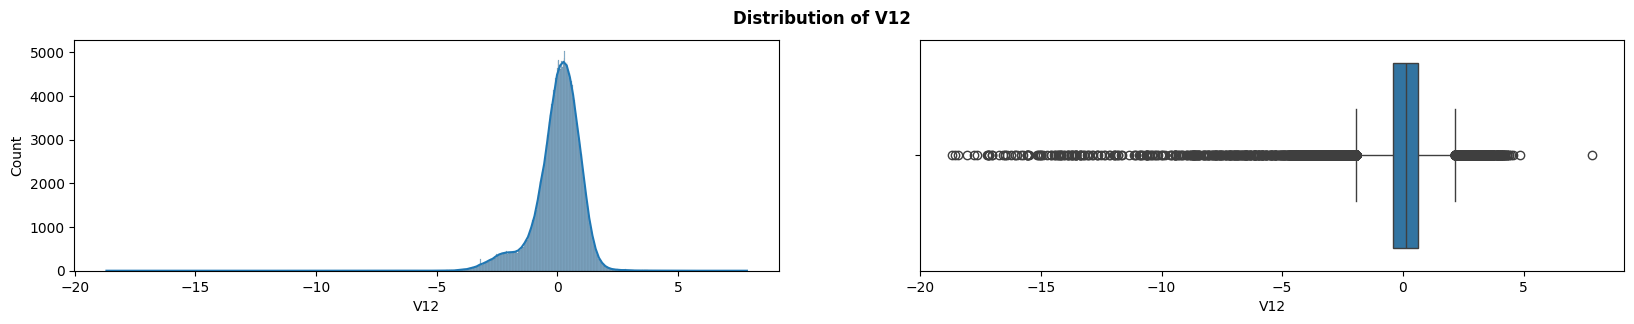

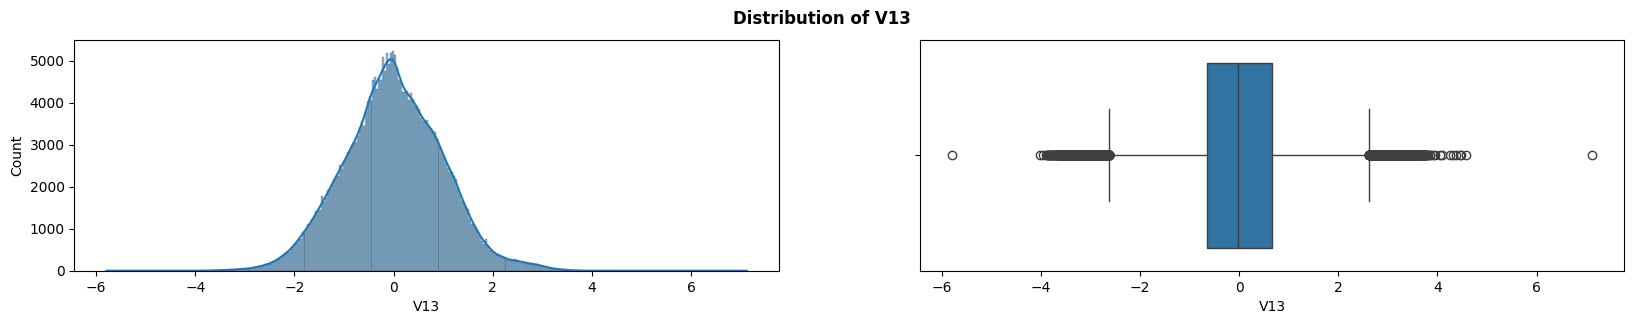

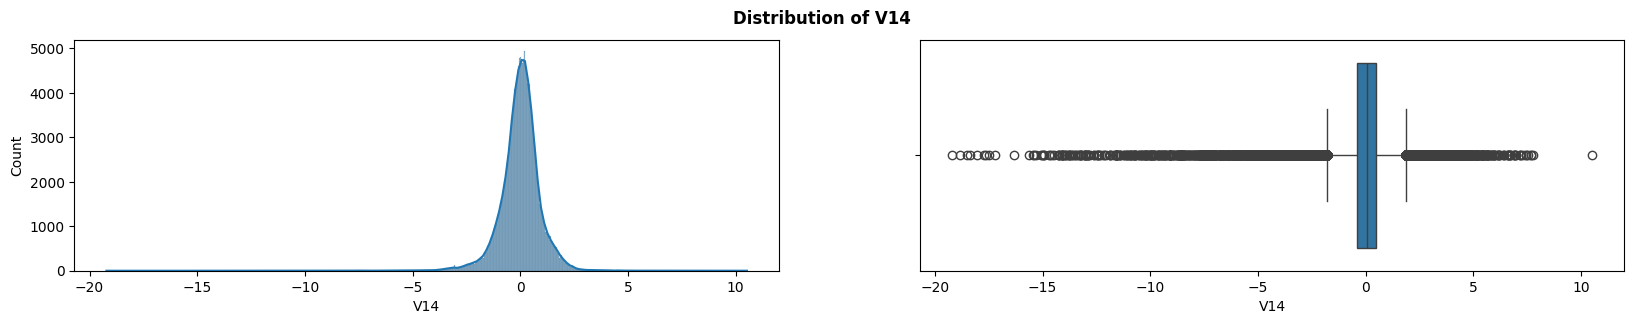

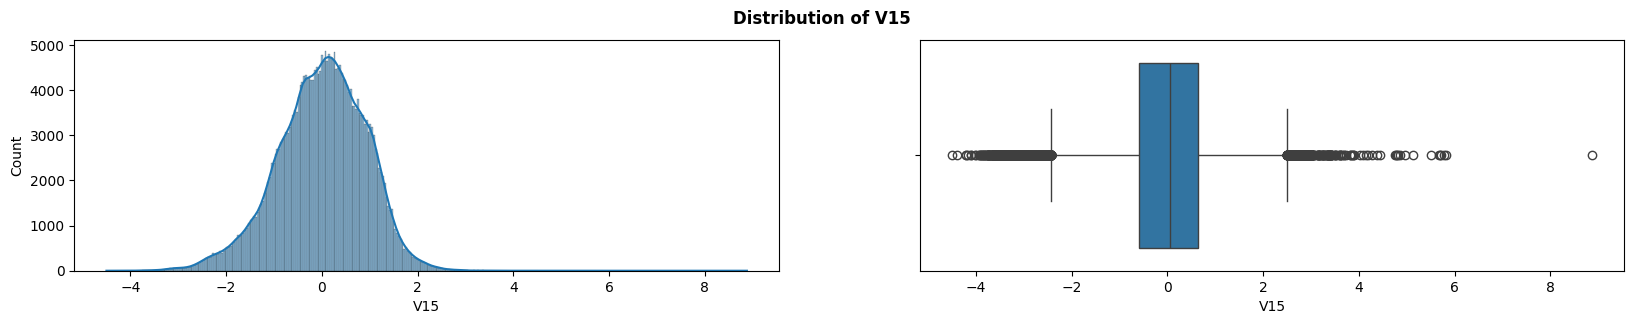

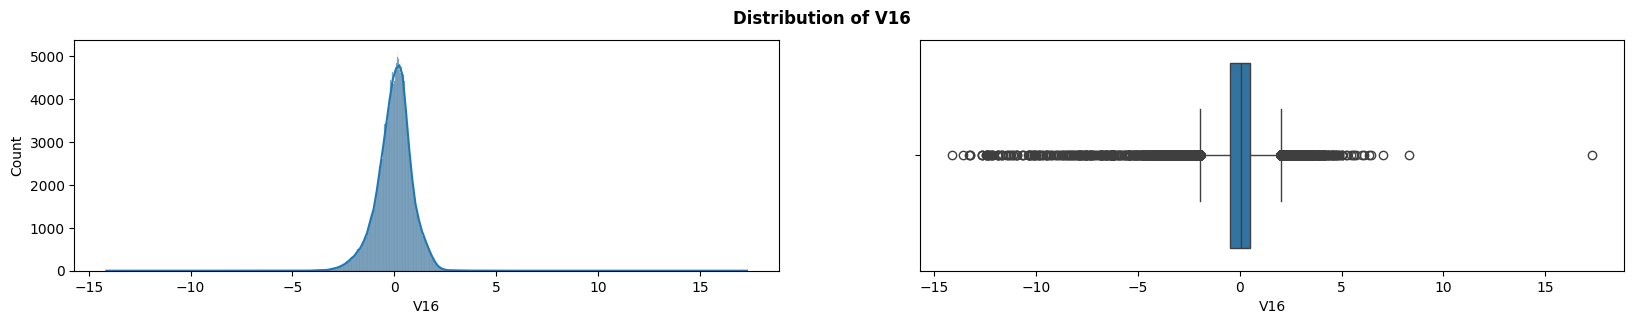

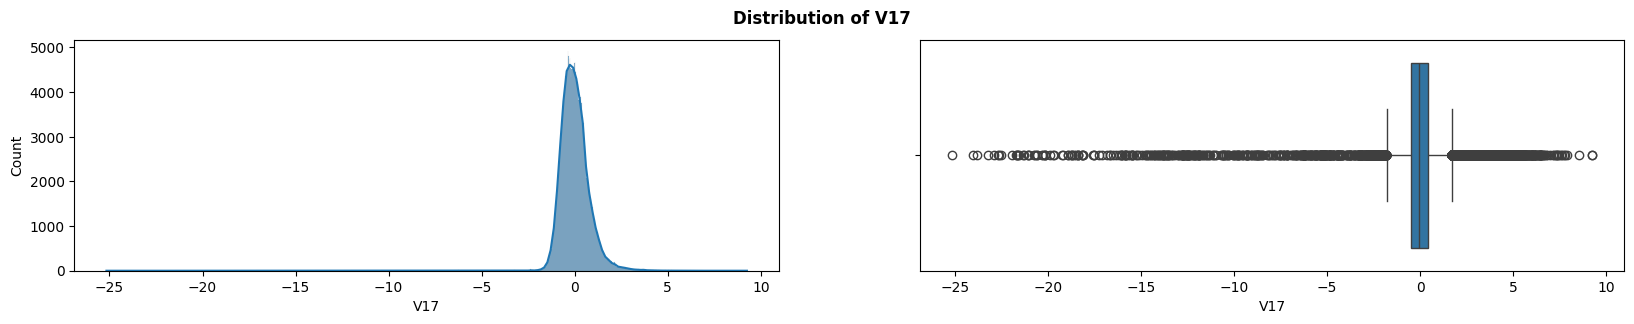

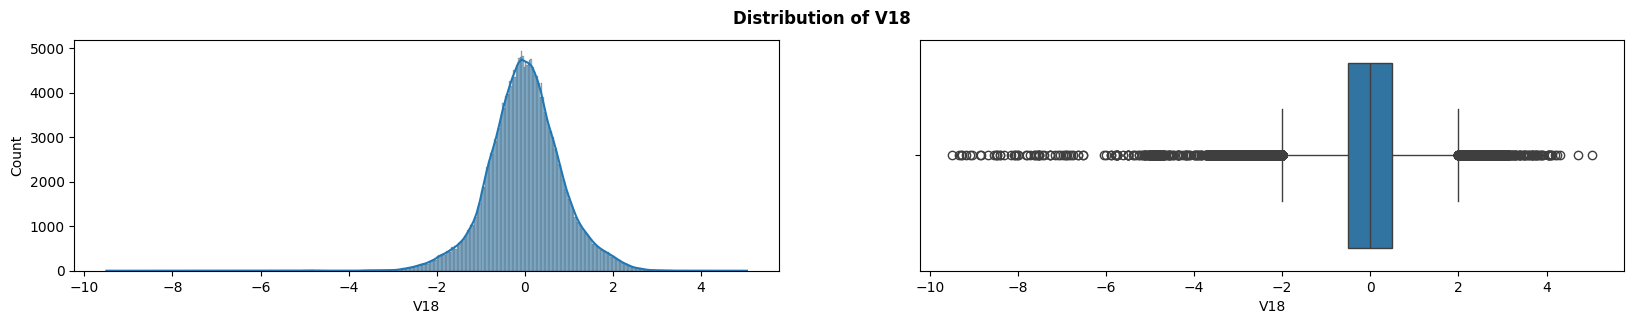

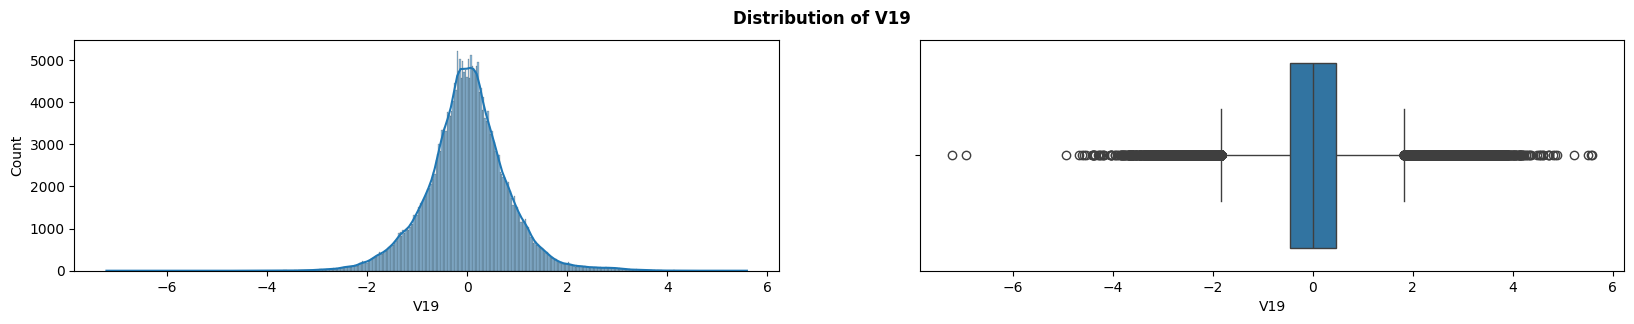

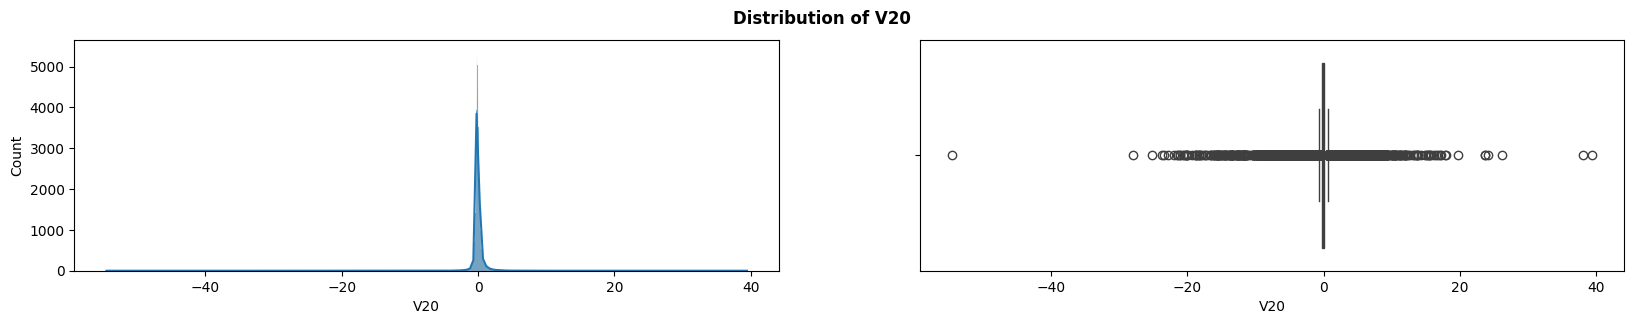

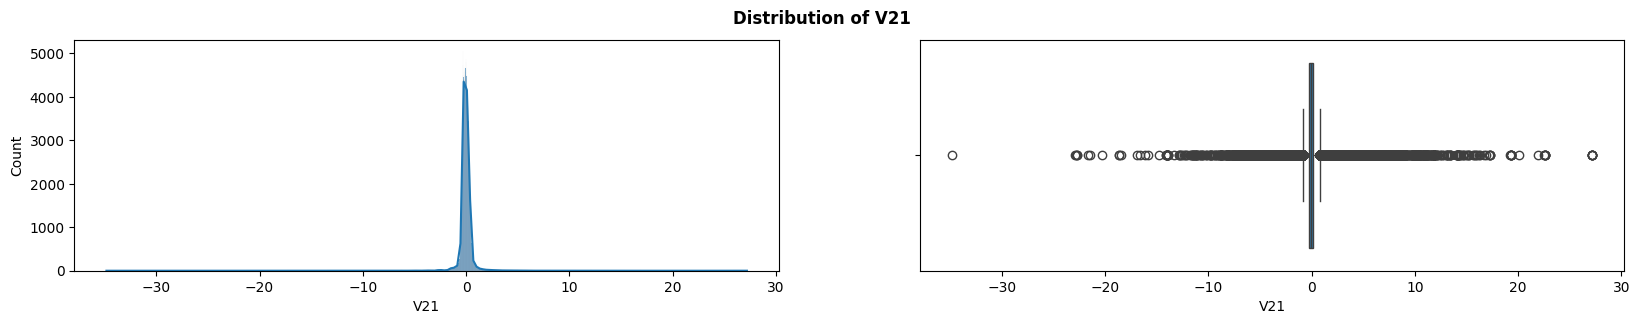

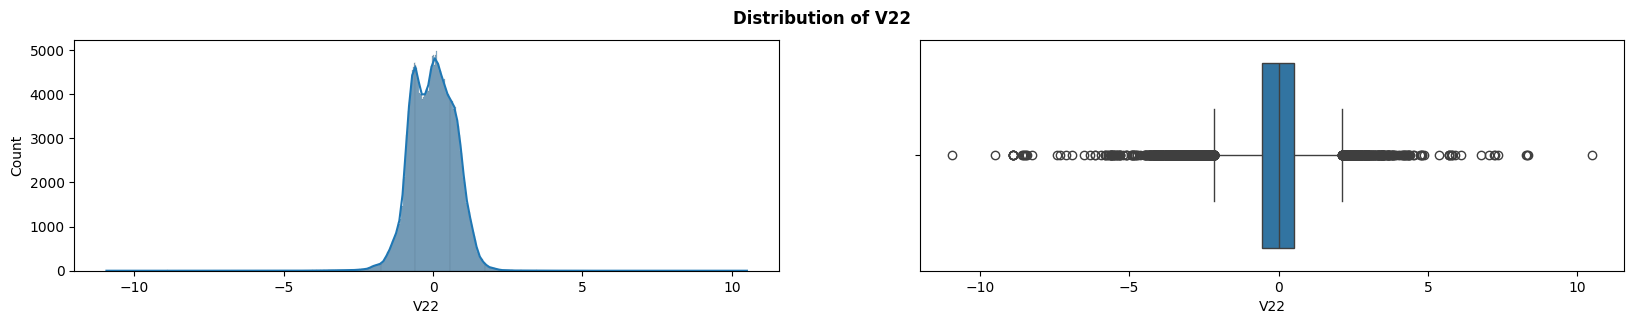

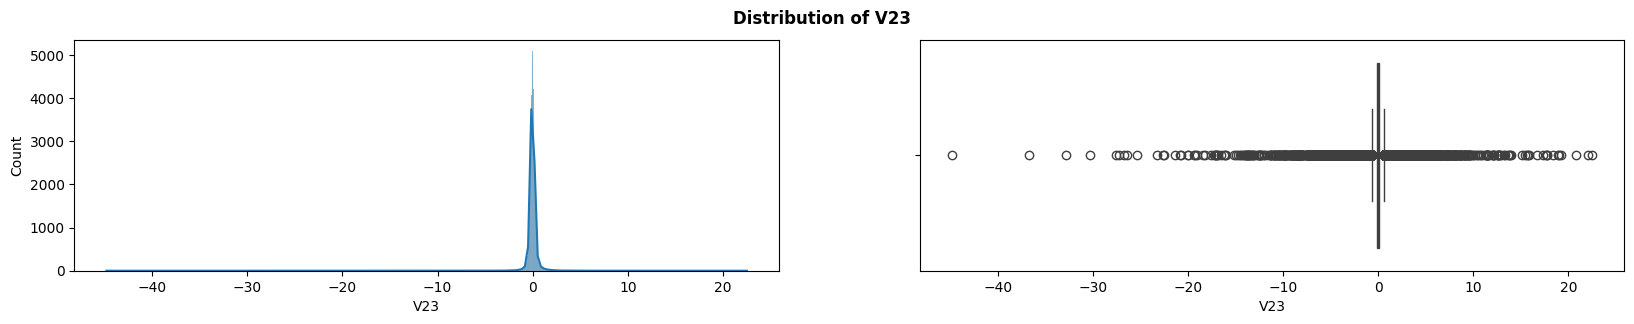

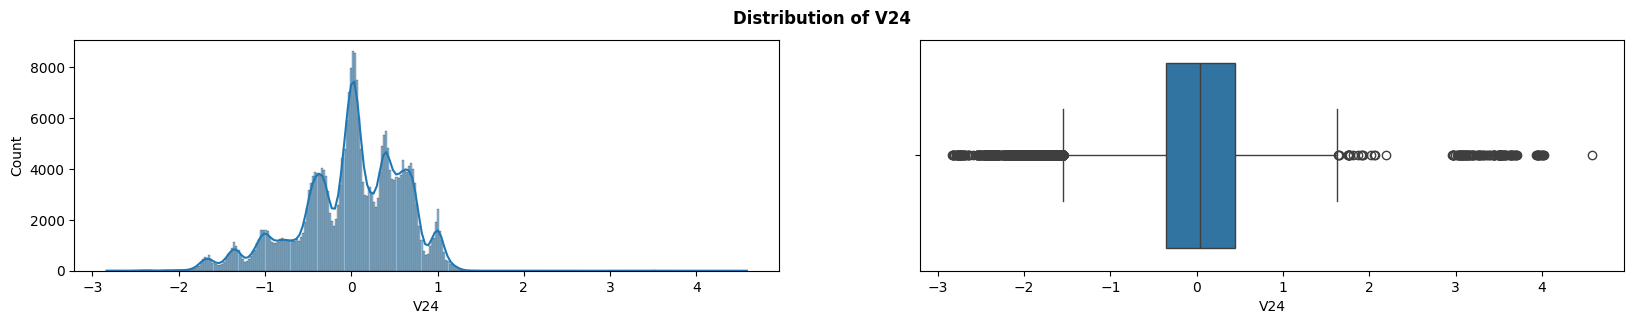

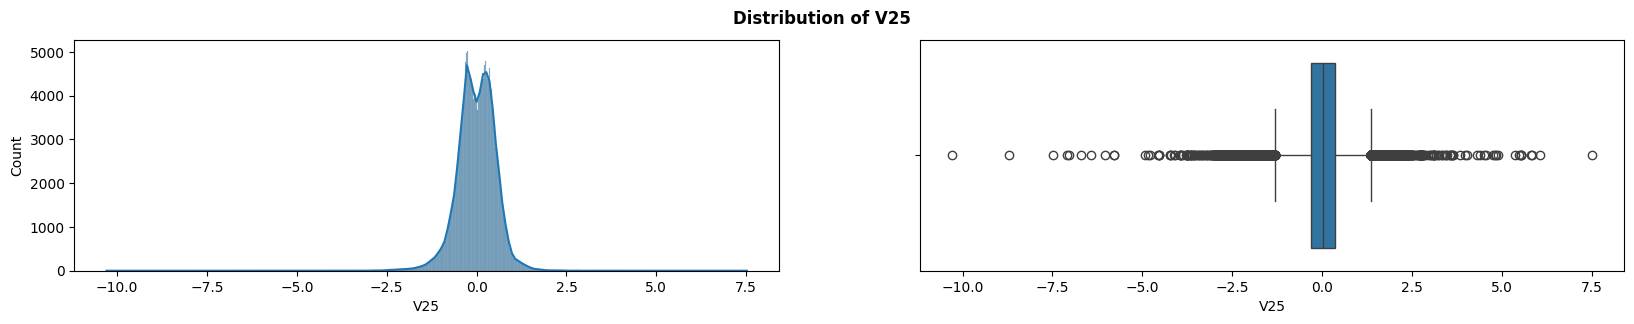

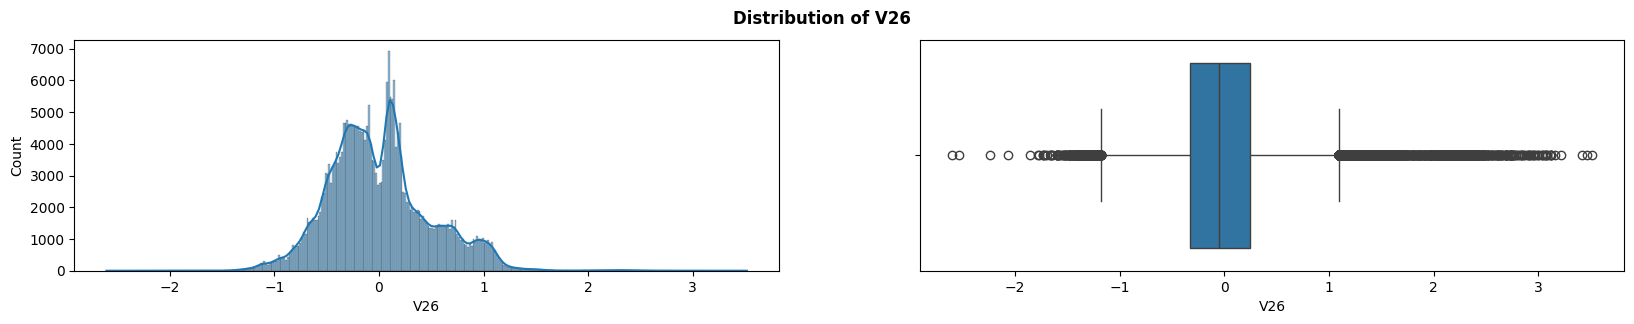

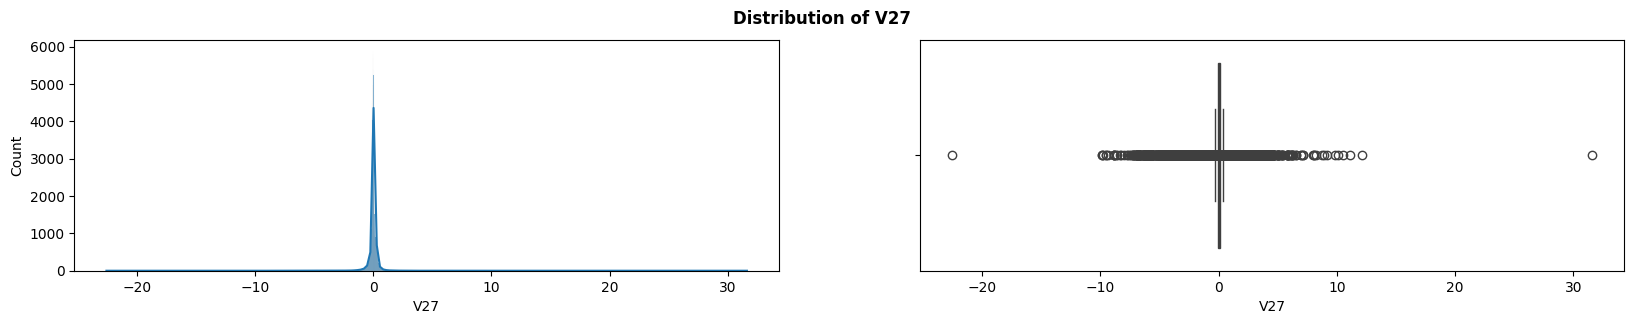

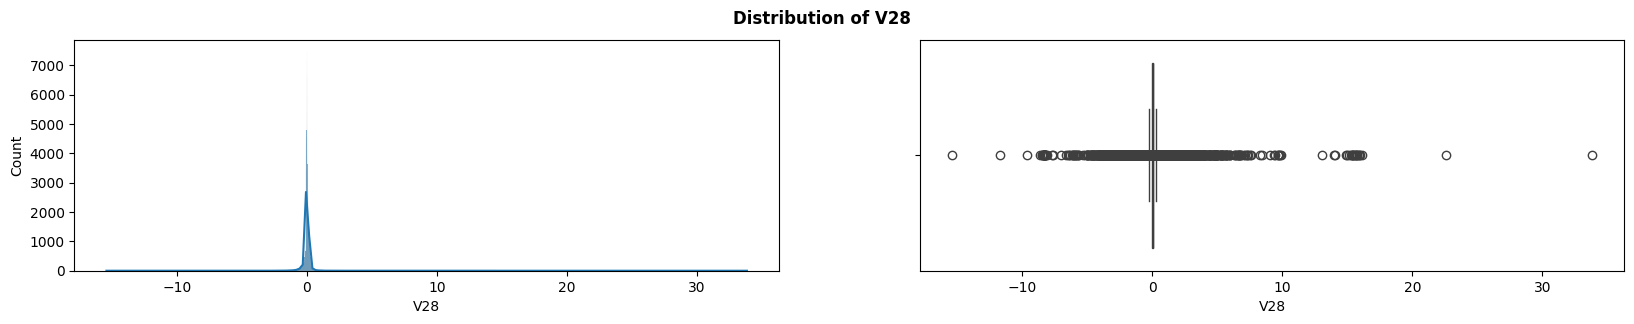

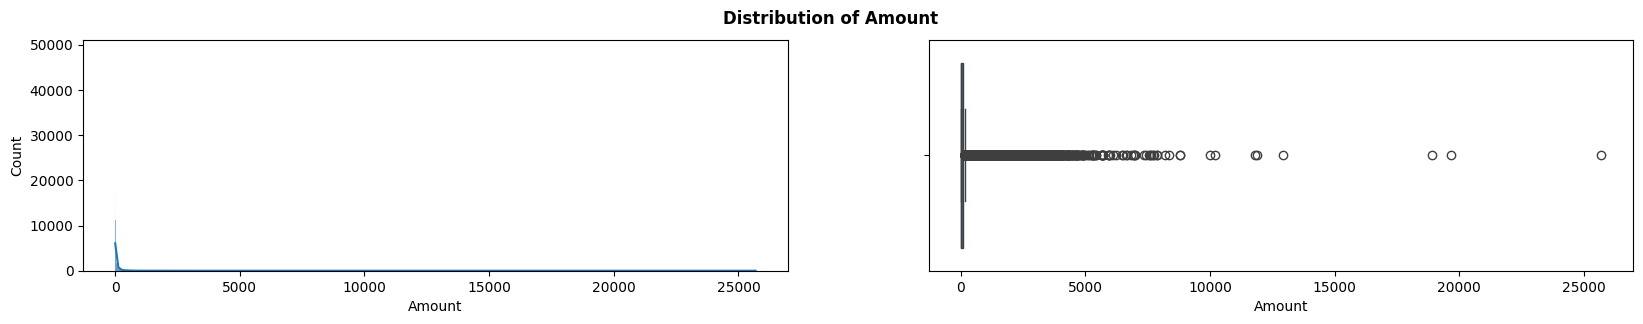

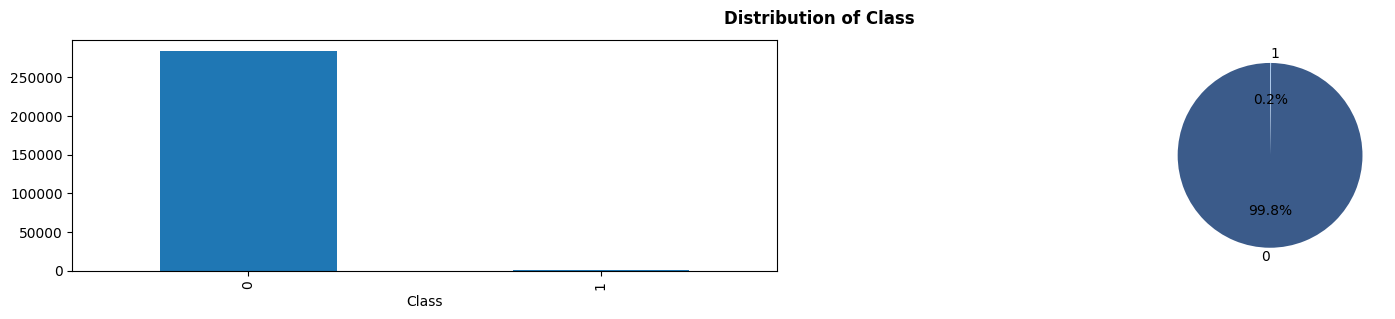

In [7]:
 # Plotting the distriution 
columns = DATA.columns.to_list()

for col in columns:
    if col == 'Class':
        count = DATA[col].value_counts()
        perc = (count / count.sum())*100

        fig , ax = plt.subplots( 1, 2 ,figsize = ( 20, 3) )
        count.plot( kind = 'bar' , stacked = False , ax = ax[0]  )

         # Pie chart
        ax[1].pie(perc, labels=perc.index, autopct='%1.1f%%',  startangle=90 , colors = ['#3B5B8A', '#A3C4EB'] )
        
        plt.suptitle( f"Distribution of {col} ", fontweight = 'bold' )
        plt.show()


    else:
        fig , ax = plt.subplots( 1, 2, figsize = (20, 3) )
        sns.histplot( x = col, data = DATA , kde = True , ax = ax[0] )
        sns.boxplot( x = col , data = DATA , ax = ax[1] )

        plt.suptitle( f"Distribution of {col} ", fontweight = 'bold' )
        plt.show()
